## Plot precipitation anomaly time series for Colorado using NCEI data (Figure 2.10)

### imports

In [3]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

### read data from NCEI

In [4]:
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/5/pcp/12/9/1895-2023.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)

## different baseline (1971-2000)
data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/5/pcp/12/9/1895-2023.csv?base_prd=true&begbaseyear=1971&endbaseyear=2000", skiprows=4)

## pull out just the year (first four digits)
data['Date'] = data['Date'].astype(str).str[0:4].astype(int)
data = data.set_index("Date")

data

,Value,Anomaly
Date,,
1896,17.19,-1.32
1897,19.90,1.39
1898,18.30,-0.21
1899,15.38,-3.13
1900,17.45,-1.06
...,...,...
2018,12.80,-5.71
2019,19.57,1.06
2020,13.15,-5.36


### plot anomaly time series with 10-year running mean in the background

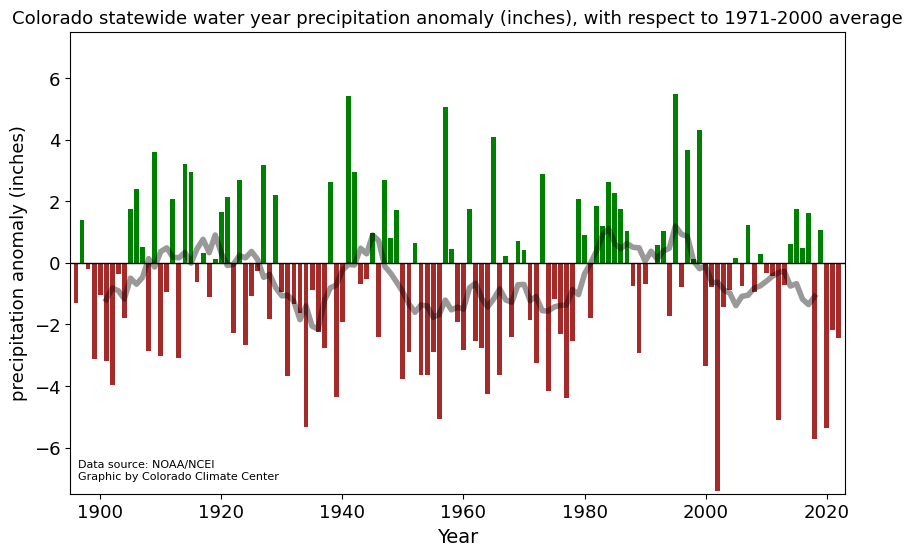

In [5]:
### add 10-year running mean in background
fig, ax = plt.subplots(figsize=(10,6))

clrs = ['brown' if (y <= 0) else 'green' for y in data['Anomaly'] ]

p = plt.bar(data.index, data['Anomaly'], linewidth=3, color=clrs)

plt.xlim(1895, 2023)
plt.ylim(-7.5,7.5)
plt.xlabel('Year',fontsize=14)

rollmean = data['Anomaly'].rolling(10,center=True).mean()
plt.plot(rollmean,lw=4, alpha=0.4, color='black')

plt.ylabel('precipitation anomaly (inches)',fontsize=13)
plt.title('Colorado statewide water year precipitation anomaly (inches), with respect to 1971-2000 average',fontsize=13)

plt.axhline(0, linewidth=1, color='black')
plt.tick_params(labelsize=13)

plt.text(0.01, 0.05, 'Data source: NOAA/NCEI\nGraphic by Colorado Climate Center', 
         horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=8)

plt.show()

fig.savefig('CO_statewide_Panom_runmean.png',dpi=225,facecolor='white',transparent=False,bbox_inches='tight')